<a href="https://colab.research.google.com/github/info-paradox/Assignments/blob/main/Final_Project_(_Airline_Passenger_Satisfaction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries and dataset importing

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model,metrics,preprocessing,tree,neighbors,model_selection,datasets,svm,model_selection
np.random.seed(42)
import seaborn as sns
from IPython.display import Audio
sound_file = '/content/beep-06.wav'


In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download teejmahal20/airline-passenger-satisfaction

  0% 0.00/2.71M [00:00<?, ?B/s]
100% 2.71M/2.71M [00:00<00:00, 44.8MB/s]


In [10]:
!unzip '/content/airline-passenger-satisfaction.zip'

Archive:  /content/airline-passenger-satisfaction.zip
  inflating: test.csv                
  inflating: train.csv               


In [11]:
#Reading the data from the dataset
train_data=pd.read_csv('/content/train.csv')
test_data=pd.read_csv('/content/test.csv')

In [12]:
#train and test data copy
x_train=train_data.copy()
x_test=test_data.copy()

In [13]:
x_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


#data cleaning

In [14]:
#checking for NAN
print(x_train.isna().sum())
print(x_test.isna().sum())

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [15]:
#using mean to replace NAN
arrival_mean=x_test['Arrival Delay in Minutes'].mean()
arrival_mean_train=x_train['Arrival Delay in Minutes'].mean()
print(f'arrival_mean is {arrival_mean}')
print(f'arrival_mean_train is {arrival_mean_train}')
x_test.replace(np.nan,arrival_mean,inplace=True)
x_train.replace(np.nan,arrival_mean_train,inplace=True)

arrival_mean is 14.74085660217047
arrival_mean_train is 15.178678301832152


In [16]:
#checking to make sure no nan remains
print(x_train.isna().sum())
print(x_test.isna().sum())

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64
Unnamed: 0  

In [17]:
#y_train,y_test extraction and removing unwanted features
columns_to_del=['satisfaction','Unnamed: 0','id']
y_train=x_train['satisfaction']
x_train.drop(columns=columns_to_del,inplace=True)
y_test=x_test['satisfaction']
x_test.drop(columns=columns_to_del,inplace=True)

In [18]:
#printing the shapes of our train,test data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(103904, 22)
(103904,)
(25976, 22)
(25976,)


#Data Preprocessing


##Data mapping

In [19]:
#saving cols labels into x_cols
x_train.columns
x_cols=x_train.columns

In [20]:
#columns encoding using labelEncoder
x_encoder=preprocessing.LabelEncoder()

x_train['Gender']=x_encoder.fit_transform(y=x_train['Gender'])
x_train['Customer Type']=x_encoder.fit_transform(y=x_train['Customer Type'])
x_train['Type of Travel']=x_encoder.fit_transform(y=x_train['Type of Travel'])
x_train['Class']=x_encoder.fit_transform(y=x_train['Class'])

x_test['Gender']=x_encoder.fit_transform(y=x_test['Gender'])
x_test['Customer Type']=x_encoder.fit_transform(y=x_test['Customer Type'])
x_test['Type of Travel']=x_encoder.fit_transform(y=x_test['Type of Travel'])
x_test['Class']=x_encoder.fit_transform(y=x_test['Class'])


y_train=x_encoder.fit_transform(y_train)
y_test=x_encoder.fit_transform(y_test)

(array([58879.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 45025.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

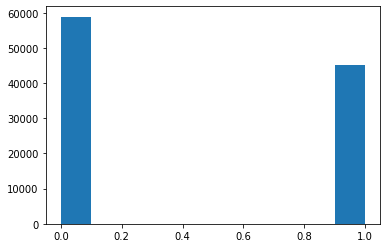

In [21]:
plt.hist(y_train)

In [22]:
mapped_train=x_train.copy()
mapped_train['satisfaction']=y_train.copy()
mapped_train.shape

(103904, 23)

##Data normilization

In [23]:
#data normilization using Standard Scaler

x_normilizer=preprocessing.StandardScaler()
x_norm_train=x_normilizer.fit_transform(x_train)
x_norm_test=x_normilizer.fit_transform(x_test)
x_train=x_norm_train
x_test=x_norm_test

In [24]:
#hat encoding
y_train_hot=tf.one_hot(y_train,depth=len(set(y_train)))
y_test_hot=tf.one_hot(y_test,depth=len(set(y_test)))
#print the shapes
print(f'y_train_hot.shape is {y_train_hot.shape}')
print(f'y_test_hot.shape is {y_test_hot.shape}')
print(f'x_test.shape is {x_test.shape}')
print(f'y_test.shape is {y_test.shape}')

y_train_hot.shape is (103904, 2)
y_test_hot.shape is (25976, 2)
x_test.shape is (25976, 22)
y_test.shape is (25976,)


In [25]:

print(f'x_train.shape is {x_train.shape}')
print(f'y_train shape is {y_train.shape}')
print(f'y_train_hot.shape is {y_train_hot.shape}')
print(f'x_test.shape is {x_test.shape}')
print(f'y_test.shape is {y_test.shape}')

x_train.shape is (103904, 22)
y_train shape is (103904,)
y_train_hot.shape is (103904, 2)
x_test.shape is (25976, 22)
y_test.shape is (25976,)


##train data visualizaion

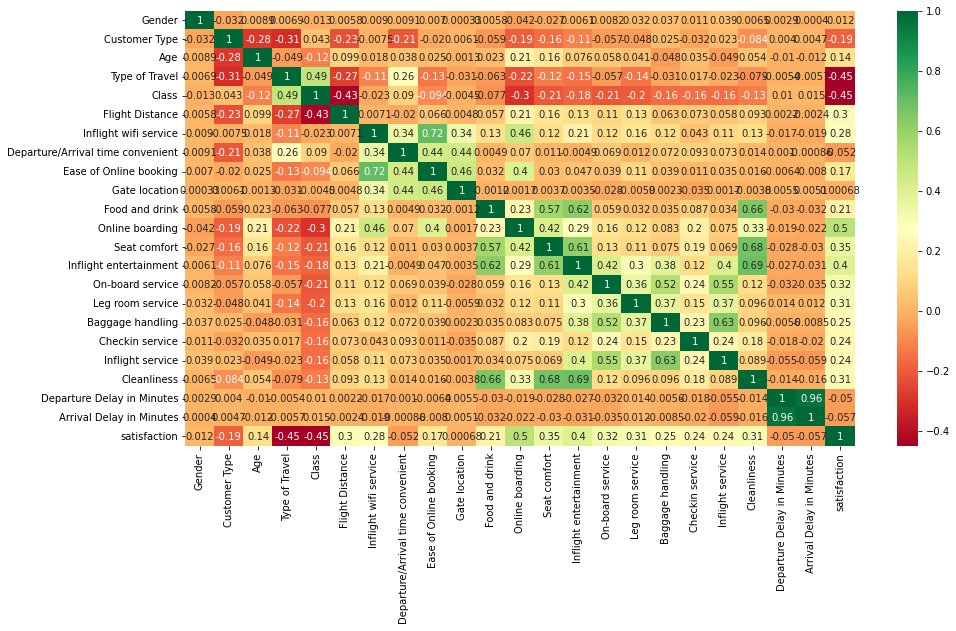

In [81]:
plt.figure(figsize = (15,8))
sns.heatmap(mapped_train.corr(), annot = True, cmap = "RdYlGn")
# mapped_train[:2]

#Models

##Logistic Regression

In [35]:
log_save={}
log_count=0
#parameters for gridsearch
log_solvers = ['newton-cg', 'lbfgs', 'liblinear']
log_c_values = [100, 10, 1.0, 0.1, 0.01]

In [36]:
#default method
log_reg=linear_model.LogisticRegression(max_iter=10000,random_state=42)
log_model=log_reg.fit(x_train,y_train)
log_pred=log_model.predict(x_test)


In [37]:
print(f'metrics.accuracy_score(y_test,log_pred) is {metrics.accuracy_score(y_test,log_pred)}')
print(f'metrics.precision_score(y_test,log_pred) is {metrics.precision_score(y_test,log_pred)}')
print(f'metrics.recall_score(y_test,log_pred) is {metrics.recall_score(y_test,log_pred)}')

log_count=log_count+1
log_save[log_count]={'acc':metrics.accuracy_score(y_test,log_pred),
                     'pre':metrics.precision_score(y_test,log_pred),
                     'recall':metrics.recall_score(y_test,log_pred)}


metrics.accuracy_score(y_test,log_pred) is 0.8711887896519864
metrics.precision_score(y_test,log_pred) is 0.8695532519952298
metrics.recall_score(y_test,log_pred) is 0.8312724721564501


In [38]:
#hyper tuning using grid search
log_grid = dict(solver=log_solvers,penalty=['l2'],C=log_c_values)
log_cv =model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search =model_selection.GridSearchCV(estimator=log_model, param_grid=log_grid, n_jobs=-1, cv=log_cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
#it took 6min to finish this op

In [39]:
grid_result.best_estimator_.get_params()

{'C': 0.01,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [40]:
print(grid_result.best_score_)
log_pred=grid_result.predict(x_test)


0.8755389626526768


In [77]:
print(f'metrics.accuracy_score(y_test,log_pred) is {metrics.accuracy_score(y_test,log_pred)}')
print(f'metrics.precision_score(y_test,log_pred) is {metrics.precision_score(y_test,log_pred)}')
print(f'metrics.recall_score(y_test,log_pred) is {metrics.recall_score(y_test,log_pred)}')

metrics.accuracy_score(y_test,log_pred) is 0.8711887896519864
metrics.precision_score(y_test,log_pred) is 0.8699605106070346
metrics.recall_score(y_test,log_pred) is 0.8307462948346926


In [41]:
print(metrics.classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14573
           1       0.87      0.83      0.85     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



In [42]:
log_confusion_matrix=metrics.confusion_matrix(y_test,log_pred)
log_confusion_matrix.view()

array([[13157,  1416],
       [ 1930,  9473]])

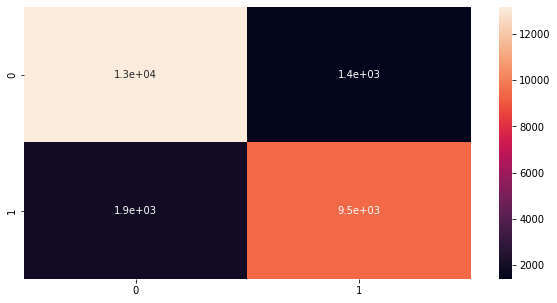

In [43]:
plt.figure(figsize=(10,5))
sns.heatmap(log_confusion_matrix,annot=True)

##KNN

In [44]:
knn_list=[]
knn_n_neighbors = range(1, 21, 2)
knn_weights = ['uniform', 'distance']
#knn_metric = ['euclidean', 'manhattan', 'minkowski']
knn_metric=['manhattan']
knn_count=0

In [ ]:
#knn
#these parameters resulted from hypertuning
nei=neighbors.KNeighborsClassifier(n_neighbors=9,weights='distance',metric='manhattan')
knn_model=nei.fit(x_train,y_train_hot)
knn_pred=knn_model.predict(x_test)
Audio(sound_file, autoplay=True)

In [46]:
#print the scores then append it to list
print('acc is ',metrics.accuracy_score(y_test,np.argmax(knn_pred,-1)))
print('pre is ',metrics.precision_score(y_test,np.argmax(knn_pred,-1),average="weighted"))
print('re is ',metrics.recall_score(y_test,np.argmax(knn_pred,-1),average="weighted"))
knn_list.append([metrics.accuracy_score(y_test,np.argmax(knn_pred,-1)),
                metrics.precision_score(y_test,np.argmax(knn_pred,-1),average="weighted"),
                metrics.recall_score(y_test,np.argmax(knn_pred,-1),average="weighted")])
knn_list

acc is  0.9399830612873422
pre is  0.9403279090259221
re is  0.9399830612873422


[[0.9399830612873422, 0.9403279090259221, 0.9399830612873422]]

In [47]:
print(metrics.classification_report(y_test,np.argmax(knn_pred,-1)))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     14573
           1       0.95      0.91      0.93     11403

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



In [ ]:
# best so far  9 distance manhattan
# tried grid search only to result in unable to allocate error after 24h
#manual loop tuning
for i in knn_n_neighbors:
    for j in knn_weights:
        for t in knn_metric:
            nei=neighbors.KNeighborsClassifier(n_neighbors=i,weights=j,metric=t)
            knn_model=nei.fit(x_train,y_train_hot)
            knn_pred=knn_model.predict(x_test)
            print(metrics.accuracy_score(y_test_hot,knn_pred),i,j,t)
            knn_list.append([metrics.accuracy_score(y_test_hot,knn_pred),i,j,t])
            knn_list

Audio(sound_file,autoplay=True)

In [48]:
knn_confusion_matrix=metrics.confusion_matrix(y_test,np.argmax(knn_pred,-1))
knn_confusion_matrix.view()

array([[14035,   538],
       [ 1021, 10382]])

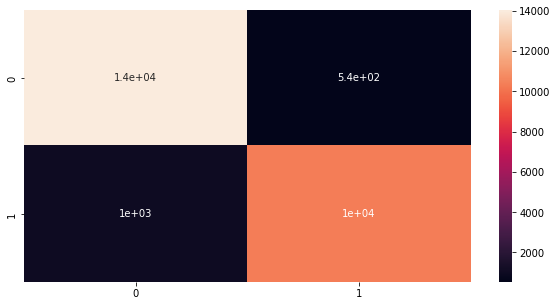

In [49]:
plt.figure(figsize=(10,5))
sns.heatmap(knn_confusion_matrix,annot=True)

##SVM

In [50]:
svm_list=[]
svm_max_list=[]
#svm_kernel = ['poly', 'rbf', 'sigmoid']
svm_kernel = ['rbf']
svm_C = [25, 24, 23, 22, 21,20,19,18,17,16,15]
#svm_C = [20]
svm_gamma = ['scale']

#svm_gamma=[1,5,10,20,'auto']
svm_max=0

In [ ]:
#svm
#0.955189405605174 defualt without tuning
# [0.9595780720665229, 22, 'rbf', 'scale'] best so far
svc=svm.SVC(random_state=42,C=22)
svc_model=svc.fit(x_train,y_train)
svc_pred=svc_model.predict(x_test)
Audio(sound_file, autoplay=True)

In [54]:
print('acc is ',metrics.accuracy_score(y_test,svc_pred))
print('pre is ',metrics.precision_score(y_test,svc_pred,average="weighted"))
print('rec is ',metrics.recall_score(y_test,svc_pred,average="weighted"))
svm_list.append([metrics.accuracy_score(y_test,svc_pred),
                metrics.precision_score(y_test,svc_pred,average="weighted"),
                metrics.recall_score(y_test,svc_pred,average="weighted")])
svm_list

acc is  0.9591931013242994
pre is  0.9593443317808991
rec is  0.9591931013242994


[[0.9591931013242994, 0.9593443317808991, 0.9591931013242994],
 [0.9591931013242994, 0.9593443317808991, 0.9591931013242994],
 [0.9591931013242994, 0.9593443317808991, 0.9591931013242994]]

In [55]:
print(metrics.classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14573
           1       0.97      0.94      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [ ]:
#hyper tuning manually using loops
max_op=len(svm_kernel)*len(svm_C)*len(svm_gamma)
svm_count=0
for i in svm_kernel:
    for j in svm_C:
        for gam in svm_gamma:
            svc=svm.SVC(random_state=42,gamma=gam,C=j,kernel=i)
            svc_model=svc.fit(x_train,y_train)
            svc_pred=svc_model.predict(x_test)
            svm_count=svm_count+1

            print(f'op {svm_count} is out of {max_op} is finished')
            print(metrics.accuracy_score(y_test,svc_pred))
            print(metrics.precision_score(y_test,svc_pred,average="weighted"))
            print(metrics.recall_score(y_test,svc_pred,average="weighted"))       

            svm_list.append([metrics.accuracy_score(y_test,svc_pred),j,i,gam])

            if svm_max<metrics.accuracy_score(y_test,svc_pred):
                svm_max=metrics.accuracy_score(y_test,svc_pred)
                svm_max_list=[svm_max,j,i,gam]
            svm_list

In [ ]:
print(svm_max_list)
svm_list

In [56]:
svm_confusion_matrix=metrics.confusion_matrix(y_test,svc_pred)
svm_confusion_matrix.view()

array([[14200,   373],
       [  687, 10716]])

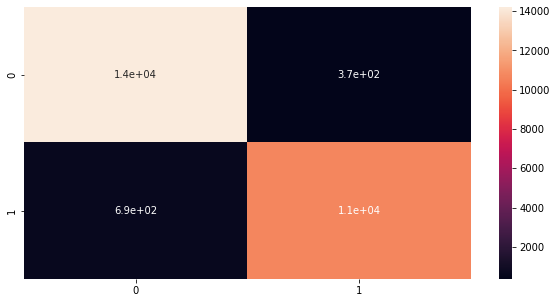

In [57]:
plt.figure(figsize=(10,5))
sns.heatmap(svm_confusion_matrix,annot=True)

##DT

In [58]:
dt_list=[]


In [ ]:
dt_classifier=tree.DecisionTreeClassifier()
dt_model=dt_classifier.fit(x_train,y_train)
dt_pred=dt_model.predict(x_test)

#play a sound when the operation is over
Audio(sound_file, autoplay=True)

In [60]:
print(f'metrics.accuracy_score(y_test,dt_pred) is {metrics.accuracy_score(y_test,dt_pred)}')
print(f'metrics.precision_score(y_test,dt_pred) is {metrics.precision_score(y_test,dt_pred)}')
print(f'metrics.recall_score(y_test,dt_pred) is {metrics.recall_score(y_test,dt_pred)}')

metrics.accuracy_score(y_test,dt_pred) is 0.9471820141669233
metrics.precision_score(y_test,dt_pred) is 0.9385328320363732
metrics.recall_score(y_test,dt_pred) is 0.9413312286240463


In [61]:
#grid search parameters for DT
n_components = list(range(1,x_train.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(criterion=criterion,max_depth=max_depth)

In [62]:
# dt_grid = dict(solver=log_solvers,penalty=['l2'],C=log_c_values)
dt_cv =model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
dt_grid_search =model_selection.GridSearchCV(estimator=dt_model, param_grid=parameters, n_jobs=-1, cv=dt_cv, scoring='accuracy',error_score=0)
dt_grid_result = dt_grid_search.fit(x_train, y_train)

In [63]:
print(dt_grid_result.best_score_)

0.9515738802739112


In [64]:
dt_grid_result.get_params()

{'cv': RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=42),
 'error_score': 0,
 'estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__presort': 'deprecated',
 'estimator__random_state'

In [65]:
dt_pred=dt_grid_result.predict(x_test)

In [66]:
print(f'metrics.accuracy_score(y_test,dt_pred) is {metrics.accuracy_score(y_test,dt_pred)}')
print(f'metrics.precision_score(y_test,dt_pred) is {metrics.precision_score(y_test,dt_pred)}')
print(f'metrics.recall_score(y_test,dt_pred) is {metrics.recall_score(y_test,dt_pred)}')
dt_list.append([metrics.accuracy_score(y_test,dt_pred),
                metrics.precision_score(y_test,dt_pred),
                metrics.recall_score(y_test,dt_pred)])

metrics.accuracy_score(y_test,dt_pred) is 0.9524946104096089
metrics.precision_score(y_test,dt_pred) is 0.9595950465515682
metrics.recall_score(y_test,dt_pred) is 0.9309830746294835


In [67]:
print(metrics.classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14573
           1       0.96      0.93      0.95     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



In [68]:
dt_confusion_matrix=metrics.confusion_matrix(y_test,dt_pred)
dt_confusion_matrix.view()

array([[14126,   447],
       [  787, 10616]])

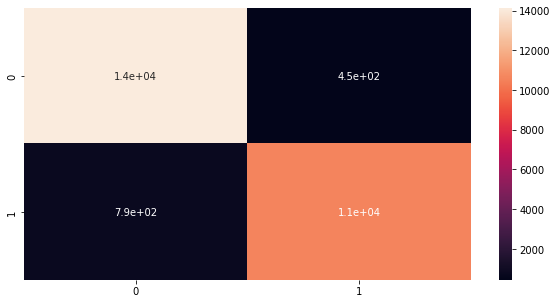

In [69]:
plt.figure(figsize=(10,5))
sns.heatmap(dt_confusion_matrix,annot=True)

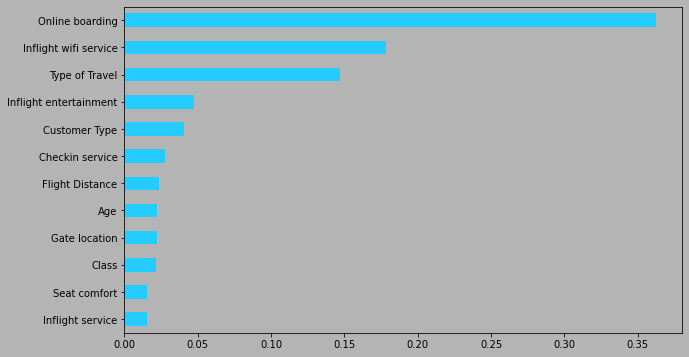

In [70]:
# tree_model.feature_importances_
importances = pd.Series(dt_model.feature_importances_,x_cols)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6), facecolor = '#b4b4b4')
ax.set(facecolor='#b4b4b4')
n=12
importances.sort_values()[-n:].plot.barh(color='#24ccff')

##DNN

In [27]:
dnn_list=[]

In [28]:
#DNN
tf.random.set_seed(1)
tf_model=tf.keras.models.Sequential([
                                     tf.keras.layers.Input(shape=(22)),
                                     tf.keras.layers.Dense(units=256,activation=tf.nn.leaky_relu,kernel_initializer=tf.keras.initializers.he_uniform),
                                     tf.keras.layers.Dropout(0.38),
                                     tf.keras.layers.Dense(units=256,activation=tf.nn.leaky_relu,kernel_initializer=tf.keras.initializers.he_uniform),
                                     tf.keras.layers.Dropout(0.38),
                                     tf.keras.layers.Dense(units=128,activation=tf.nn.leaky_relu,kernel_initializer=tf.keras.initializers.he_uniform),
                                     tf.keras.layers.Dense(units=2,activation=tf.nn.sigmoid,name="output"),
])

In [29]:
tf_model.compile(optimizer=tf.optimizers.Adam(),loss=tf.keras.losses.BinaryCrossentropy(),metrics="acc")

In [ ]:
history=tf_model.fit(x=x_train,y=y_train_hot,batch_size=32,epochs=50,validation_data=(x_test,y_test_hot))
Audio(sound_file,autoplay=True)

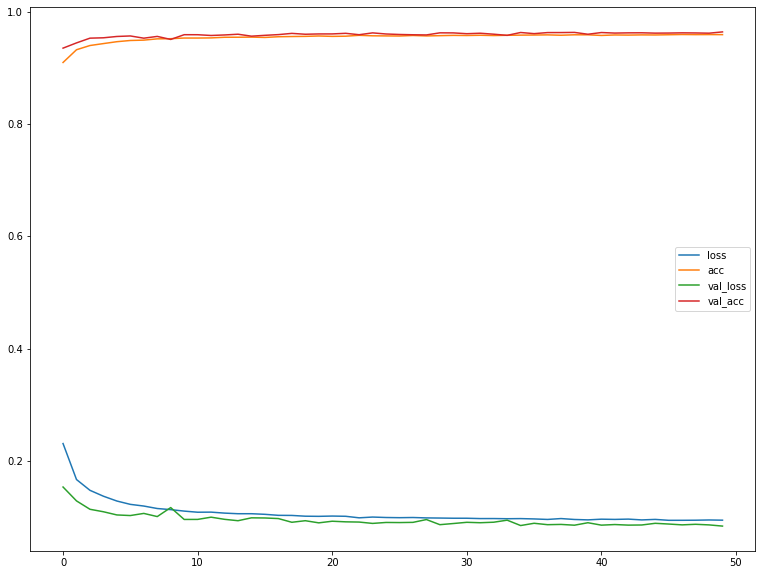

In [31]:
hist_df=pd.DataFrame(history.history)
hist_df.plot(figsize=(13,10))

In [32]:
dnn_pred=tf_model.predict(x_test)
acc=tf.reduce_mean(tf.metrics.categorical_accuracy(y_test_hot,dnn_pred))
print('acc:',acc)
loss=tf.reduce_mean(tf.metrics.categorical_crossentropy(y_test_hot,dnn_pred))
print('loss:',loss)
pr=metrics.precision_score(y_test,np.argmax(dnn_pred,-1),average='weighted')
print('pr:',pr)
re=metrics.recall_score(y_test,np.argmax(dnn_pred,-1),average='weighted')
print('re:',re)
confusion_matrix=metrics.confusion_matrix(y_test,np.argmax(dnn_pred,-1))
dnn_list.append([acc,loss,pr,re])
dnn_list

acc: tf.Tensor(0.96412075, shape=(), dtype=float32)
loss: tf.Tensor(0.08458337, shape=(), dtype=float32)
pr: 0.9644108171484624
re: 0.9641207268247614


[[<tf.Tensor: shape=(), dtype=float32, numpy=0.96412075>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.08458337>,
  0.9644108171484624,
  0.9641207268247614]]

In [33]:
dnn_confusion_matrix=metrics.confusion_matrix(y_test,np.argmax(dnn_pred,-1))
dnn_confusion_matrix.view()

array([[14301,   272],
       [  660, 10743]])

In [34]:
print(metrics.classification_report(y_test,np.argmax(dnn_pred,-1)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.98      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



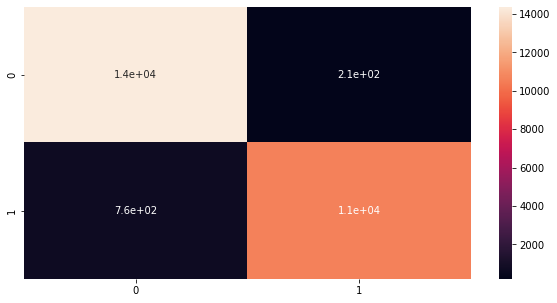

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(dnn_confusion_matrix,annot=True)

#Comparison and Best Model

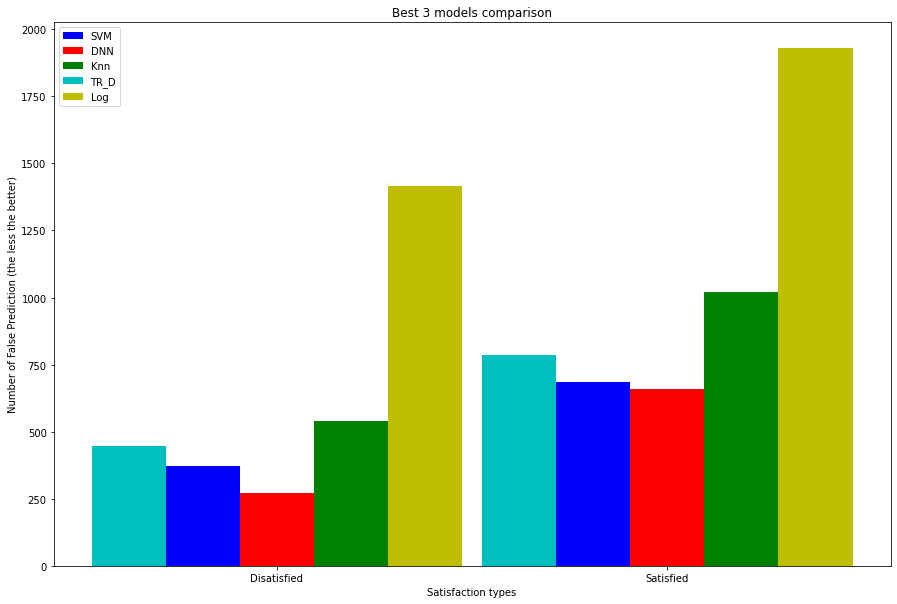

In [71]:
plt.figure(figsize=(15,10))
bar_width=0.19
labelss=['Disatisfied','Satisfied']
indexes=np.arange(0,2,1)

#getting the arrays of confusion matrix for all models
svm_arry=np.array(svm_confusion_matrix.view())
Knn_arry=np.array(knn_confusion_matrix.view())
Dnn_arry=np.array(dnn_confusion_matrix.view())
Tree_arry=np.array(dt_confusion_matrix.view())
Log_arry=np.array(log_confusion_matrix.view())

#filter the values so that only wrong prediction are drawen
plt.bar(indexes-bar_width,svm_arry[svm_arry<5000],width=bar_width,color="b",label="SVM")
plt.bar(indexes,Dnn_arry[Dnn_arry<5000],width=bar_width,color="r",label="DNN")
plt.bar(indexes+bar_width,Knn_arry[Knn_arry<5000],width=bar_width,color="g",label="Knn")
plt.bar(indexes-(bar_width*2),Tree_arry[Tree_arry<5000],width=bar_width,color="c",label="TR_D")
plt.bar(indexes+(bar_width*2),Log_arry[Log_arry<5000],width=bar_width,color="y",label="Log")

#labels and title
plt.xticks(np.arange(len(labelss)),labels=labelss)
plt.xlabel('Satisfaction types')
plt.title('Best 3 models comparison')
plt.ylabel('Number of False Prediction (the less the better)')
plt.legend()

In [76]:
print("""
Winner:DNN 
          it managed to achive the best results so for and that can be seen from it classification report
          in addtion to the barchart model comparison.the second best results achived by svm
          as for the rest they falls behind.                                                   
                                                                                                                """)
print('Dnn classification report:-')
print(metrics.classification_report(y_test,np.argmax(dnn_pred,-1)))


Winner:DNN 
          it managed to achive the best results so for and that can be seen from it classification report
          in addtion to the barchart model comparison.the second best results achived by svm
          as for the rest they falls behind.                                                   
                                                                                                                
Dnn classification report:-
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.98      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

